In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import pickle
import matplotlib.pyplot as plt

Formulação Matematica (mostrar que é WSS):
 - Cosseno + ruído
 - Cosseno + harmonicos + ruído
 
WSS: Média constante e autocorrelação só depende de tau

Mostrar a estacionariedade computacionalmente pela média e autocorrelação

Ergodicidade (janelas)

Calcular os cumulantes caso exista estacionariedade nos momentos.
 - Autocorrelação (Cumulante de 2ª ordem)
 - Calcular cumulantes de 3ª e 4ª ordem

# Funcoes Auxiliares

In [2]:
def read_data():
    full_data = pickle.load(open('Input.pkl', 'rb+'))
    
    X_adequate = full_data["X_adequate"][:,:1600,3:]
    X_intermediate = full_data["X_intermediate"][:,:1600,3:]
    X_inadequate = full_data["X_inadequate"][:,:1600,3:]
    
    print("==========")
    print(f"Adequate Data Shape: {X_adequate.shape}")
    print(f"Intermediate Data Shape: {X_intermediate.shape}")
    print(f"Inadequate Data Shape: {X_inadequate.shape}")
    print("==========")

    return X_adequate, X_intermediate, X_inadequate

In [3]:
def verificar_media(X, titulo_superior):
    media = X.mean(0)
    
    titulo = ["Corrente A", "Corrente B", "Corrente C"]
    
    fig = plt.figure(figsize=(16,15))
    ax = fig.subplots(3,1, sharey=True)
    
    for i in range(3):
        ax[i].set_title(titulo[i], fontsize=25)
        ax[i].plot(X[0,:,i], label="Realização")
        ax[i].plot(media[:,i], label="Média")
        ax[i].set_xlabel('Amostras', fontsize=25)
        ax[i].set_ylabel('Magnitude', fontsize=25)
        ax[i].tick_params(axis='both', which='major', labelsize=25)
        ax[i].locator_params(axis='y', nbins=5)
        ax[i].legend(fontsize=25)
        ax[i].grid()

    fig.tight_layout()
    plt.savefig(f"Figures/Media_{titulo_superior.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()

In [4]:
def plotar_autocorrelacao(X, titulo_superior, size=[100]):
    import scipy.fftpack
    import scipy.signal as signal
    
    realizacoes, ts_len, sensores = X.shape
    
    titulo = ["Corrente A", "Corrente B", "Corrente C"]
    
    autocorrelacoes = []
    potencia = []
    
    
    for sensor in range(sensores):
        x = X[:, :, sensor]
    
        r = []        
        for i in range(ts_len):
            r.append(np.diag(x @ np.roll(x, -i, 1).T)/ts_len/x.var(1))
        r = np.array(r).T
        
        autocorr = r.mean(0)
        autocorrelacoes.append(autocorr)
        
        T = 1.0 / 24e3
        autocorr_mean = autocorr.mean()
        yf = scipy.fftpack.fft(autocorr - autocorr_mean)[:ts_len // 2]
        xf = np.linspace(0.0, 1.0 / (2.0 * T), ts_len // 2)
        potencia.append(abs(yf))
        
    
    
    for s in size:
        fig = plt.figure(figsize=(16,15))
        ax = fig.subplots(3,1, sharey=True)
        for sensor in range(sensores):
            ax[sensor].set_title(titulo[sensor], fontsize=25)
            ax[sensor].stem(autocorrelacoes[sensor][:s], use_line_collection=True)
            ax[sensor].set_xlabel('Atraso', fontsize=25)
            ax[sensor].set_ylabel('Magnitude', fontsize=25)
            ax[sensor].tick_params(axis='both', which='major', labelsize=25)
            ax[sensor].locator_params(axis='y', nbins=5)
            ax[sensor].grid()
        
        fig.tight_layout()
            
        plt.savefig(f"Figures/Autocorrelação_{titulo_superior.replace(' ', '_')}_{s}.png", bbox_inches='tight')
        plt.show()
        
        
        
    fig = plt.figure(figsize=(16,15))
    ax = fig.subplots(3,1, sharey=True)
    for sensor in range(sensores):
        ax[sensor].set_title(titulo[sensor], fontsize=25)
        ax[sensor].plot(xf, potencia[sensor])
        ax[sensor].set_xlabel('Frequência [Hz]', fontsize=25)
        ax[sensor].set_ylabel('Magnitude', fontsize=25)
        ax[sensor].tick_params(axis='both', which='major', labelsize=25)
        ax[sensor].locator_params(axis='y', nbins=5)
        ax[sensor].grid()
        
    fig.tight_layout()
            
    plt.savefig(f"Figures/Densidade_Espectral_de_Potencia_{titulo_superior.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()
    

In [5]:
X_adequate, X_intermediate, X_inadequate = read_data()

_, ts_len, sensores = X_adequate.shape

Adequate Data Shape: (552, 1600, 3)
Intermediate Data Shape: (80, 1600, 3)
Inadequate Data Shape: (153, 1600, 3)


# Simplificação Matematica

In [6]:
fa = 24e3
fs1 = 60
fs2 = 6e3

T = 1/fa

tt = np.arange(0, T*ts_len,T)

xx = np.sin(2*np.pi*fs1*tt) + np.sin(2*np.pi*fs2*tt) + np.random.randn(ts_len)

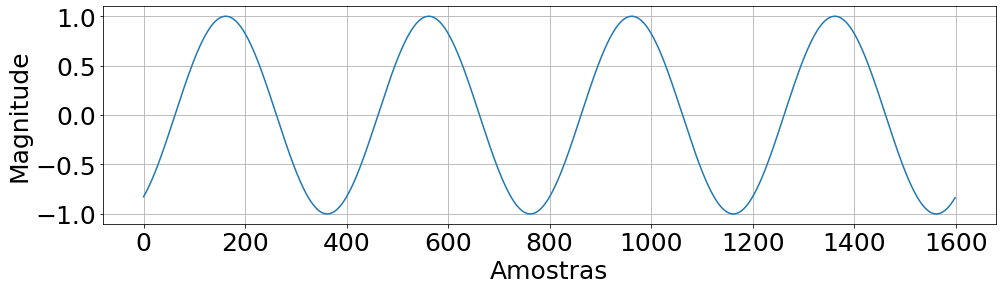

In [7]:
# Sinal Senoidal de Frequencia 60Hz
fase = np.random.rand()*2*np.pi
xx = np.sin(2*np.pi*fs1*tt + fase)

plt.figure(figsize=(16,4))
plt.plot(xx)
plt.xlabel('Amostras', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.grid()
plt.savefig(f"Figures/Seno/Seno_60Hz.png", bbox_inches='tight')
plt.show()

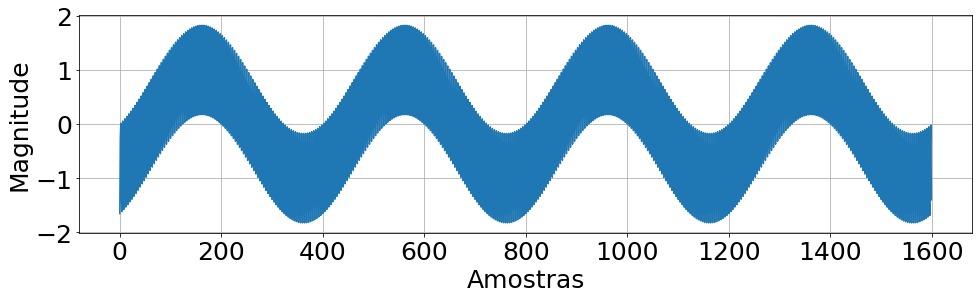

In [8]:
# Sinal Senoidal de Frequencia 60Hz + harmonico 6kHz
xx = np.sin(2*np.pi*fs1*tt + fase) + np.sin(2*np.pi*fs2*tt + fase)

plt.figure(figsize=(16,4))
plt.plot(xx)
plt.xlabel('Amostras', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.grid()
plt.savefig(f"Figures/Seno/Seno_60Hz_6kHz.png", bbox_inches='tight')
plt.show()

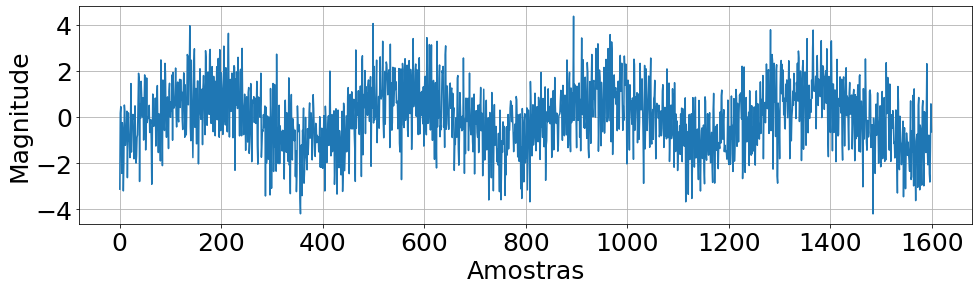

In [9]:
# Sinal Senoidal de Frequencia 60Hz + harmonico 6kHz + ruído (média 0, variancia 1)
xx = np.sin(2*np.pi*fs1*tt + fase) + np.sin(2*np.pi*fs2*tt + fase) + np.random.randn(ts_len)

plt.figure(figsize=(16,4))
plt.plot(xx)
plt.xlabel('Amostras', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.grid()
plt.savefig(f"Figures/Seno/Seno_60Hz_6kHz_Ruido.png", bbox_inches='tight')
plt.show()

In [10]:
A = np.zeros((100,ts_len))

# gerando 100 realizações de um sinal de 60 Hz, com componente em 6kHz e ruído
for i in range(100):
    fase = np.random.rand()*2*np.pi
    A[i,:] = np.sin(2*np.pi*fs1*tt + fase) + np.sin(2*np.pi*fs2*tt + fase) + np.random.randn(ts_len)

# Calculo da autocorrelação
aa = []
for i in range(ts_len):
    aa.append(np.diag(A @ np.roll(A, -i, 1).T)/ts_len/A.var(1))
aa = np.array(aa).T.mean(0)

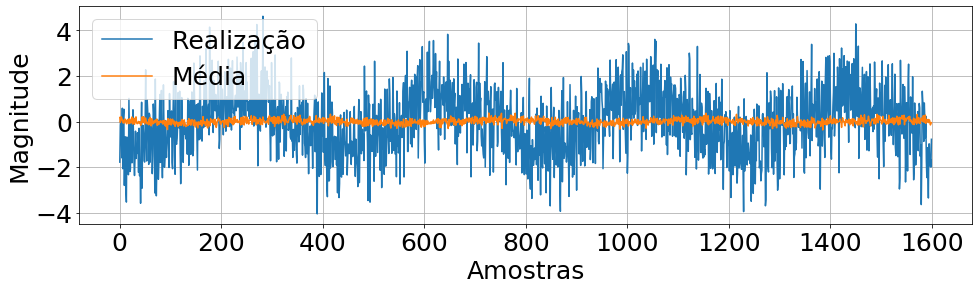

In [11]:
media = A.mean(0)
    
plt.figure(figsize=(16,4))
plt.plot(A[0,:], label='Realização')
plt.plot(media, label='Média')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.xlabel('Amostras', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.legend(fontsize=25)
plt.grid()

plt.savefig(f"Figures/Seno/Seno_Media.png", bbox_inches='tight')
plt.show()

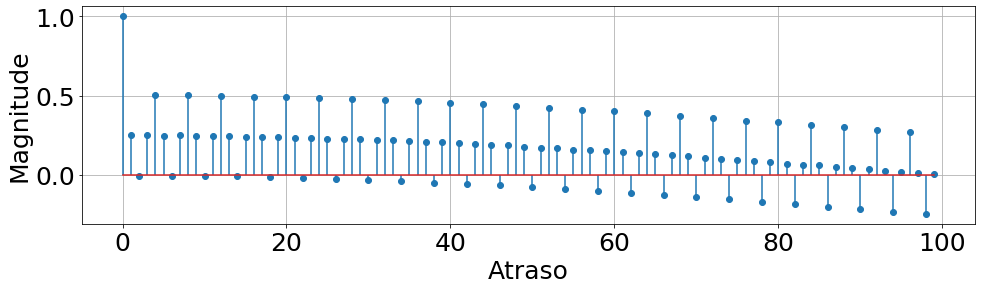

In [12]:
plt.figure(figsize=(16,4))
plt.stem(aa[:100], use_line_collection=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.xlabel('Atraso', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.grid()
plt.savefig(f"Figures/Seno/Autocorrelação__{100}.png", bbox_inches='tight')
plt.show()

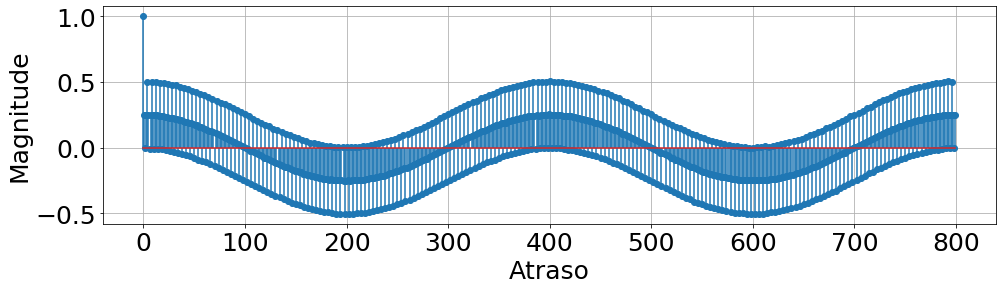

In [13]:
plt.figure(figsize=(16,4))
plt.stem(aa[:800], use_line_collection=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.xlabel('Atraso', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.grid()
plt.savefig(f"Figures/Seno/Autocorrelação__{800}.png", bbox_inches='tight')
plt.show()

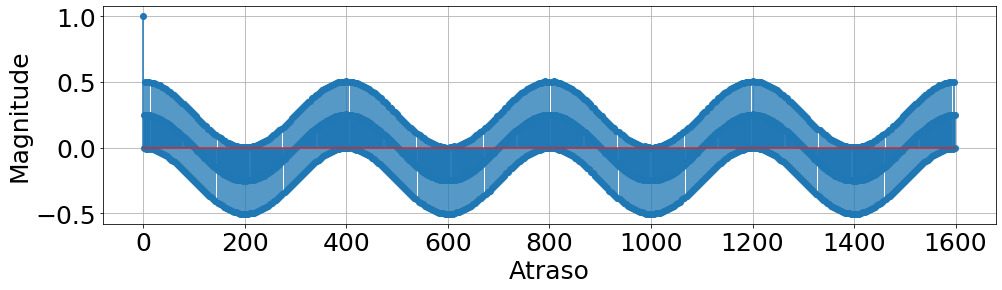

In [14]:
plt.figure(figsize=(16,4))
plt.stem(aa, use_line_collection=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.locator_params(axis='y', nbins=5)
plt.xlabel('Atraso', fontsize=25)
plt.ylabel('Magnitude', fontsize=25)
plt.grid()
plt.savefig(f"Figures/Seno/Autocorrelação__{1600}.png", bbox_inches='tight')
plt.show()

# Caracterização do Processo

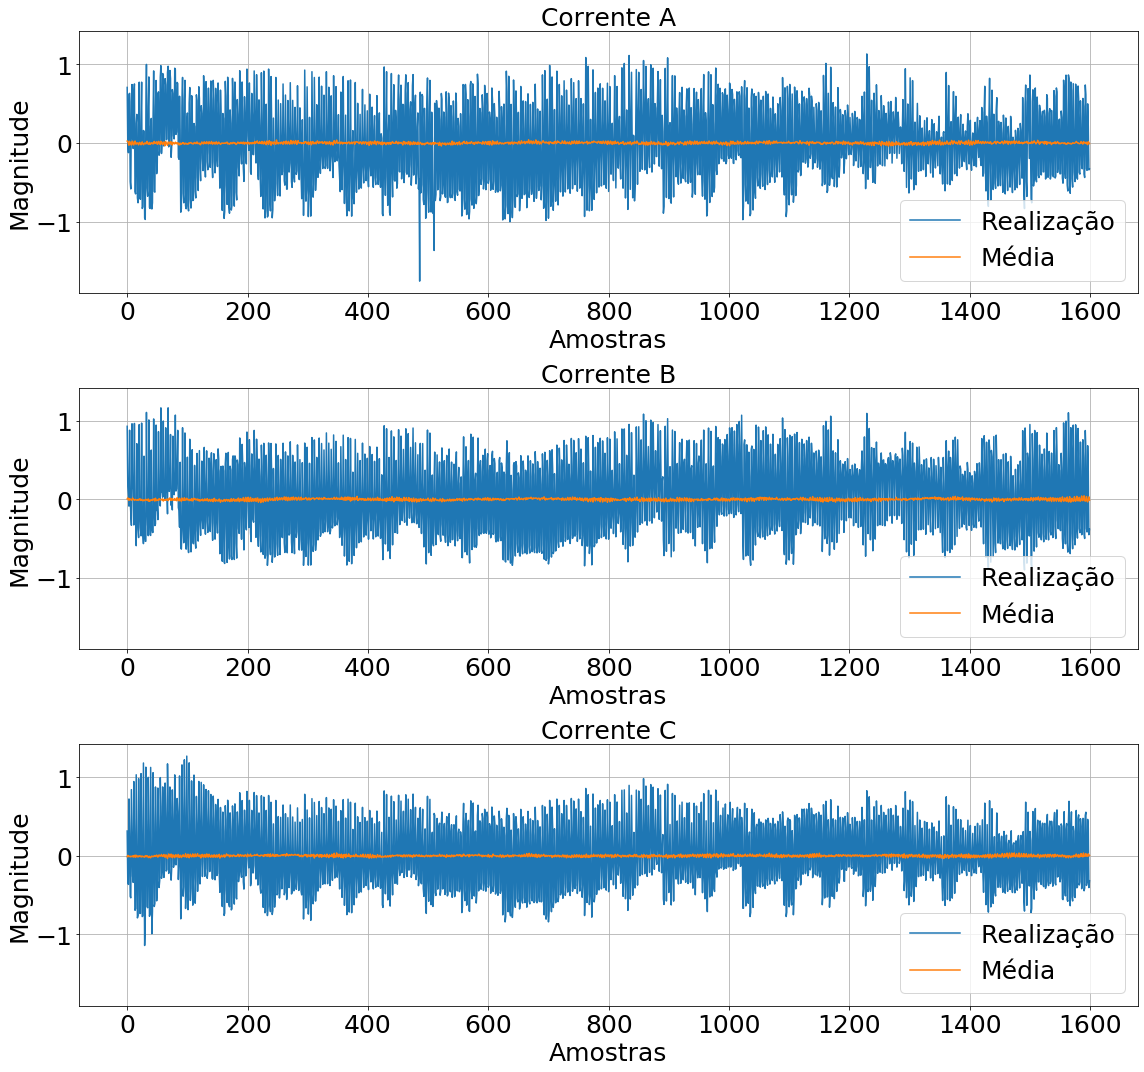

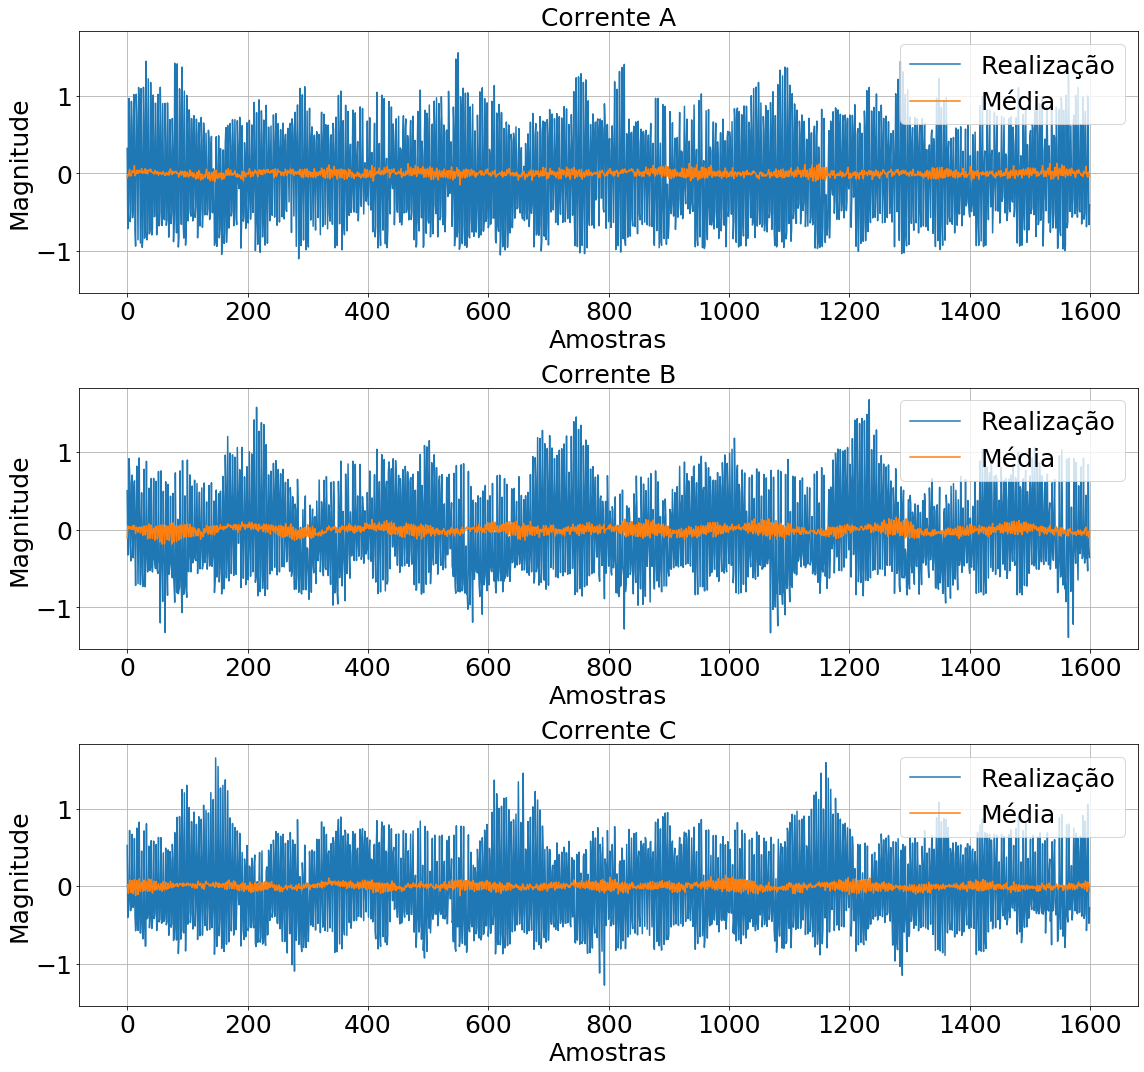

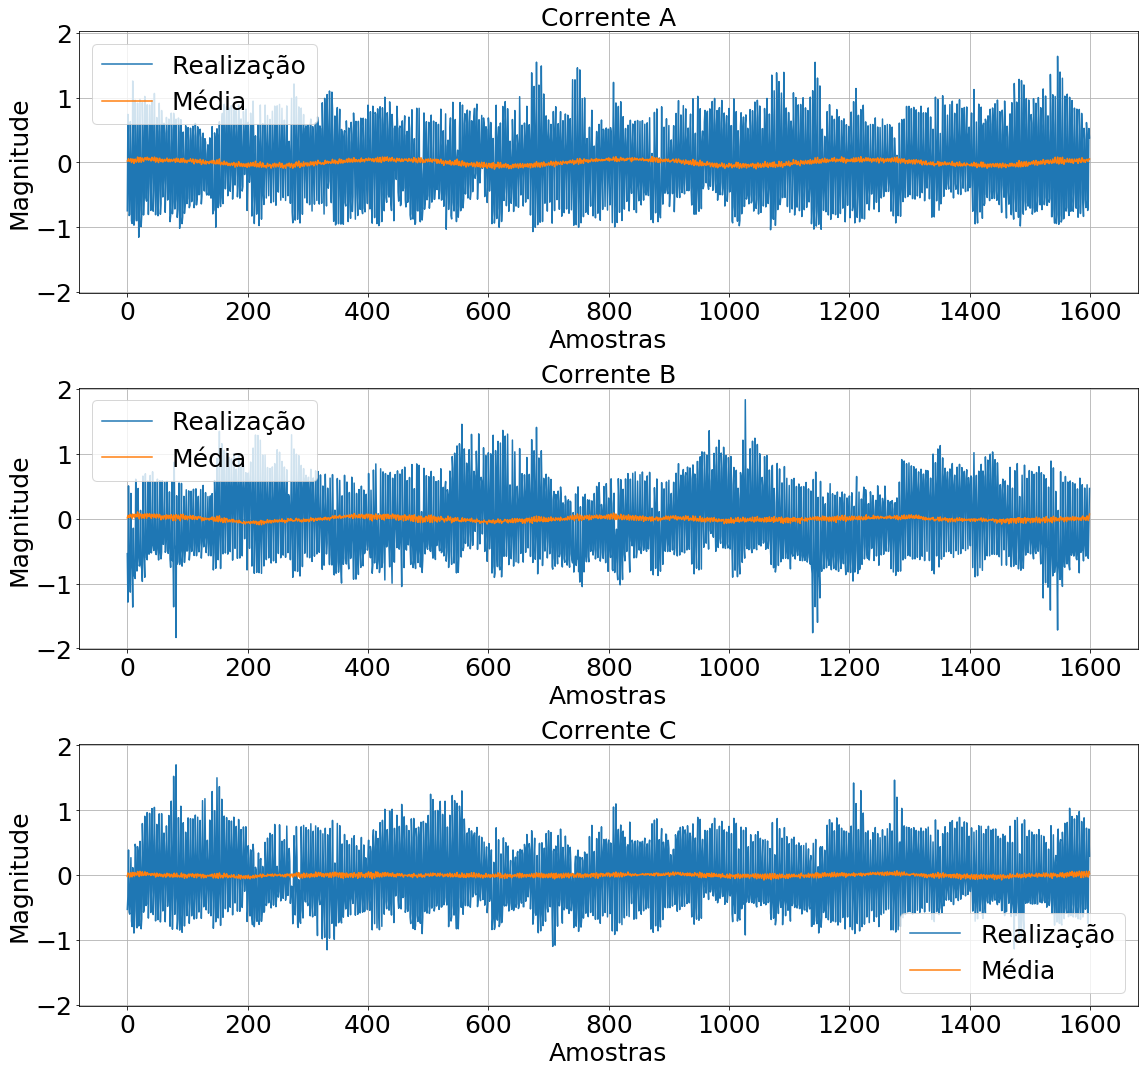

In [15]:
verificar_media(X_adequate, "Ferramenta Adequada")
verificar_media(X_intermediate, "Ferramenta Intermediaria")
verificar_media(X_inadequate, "Ferramenta Inadequada")

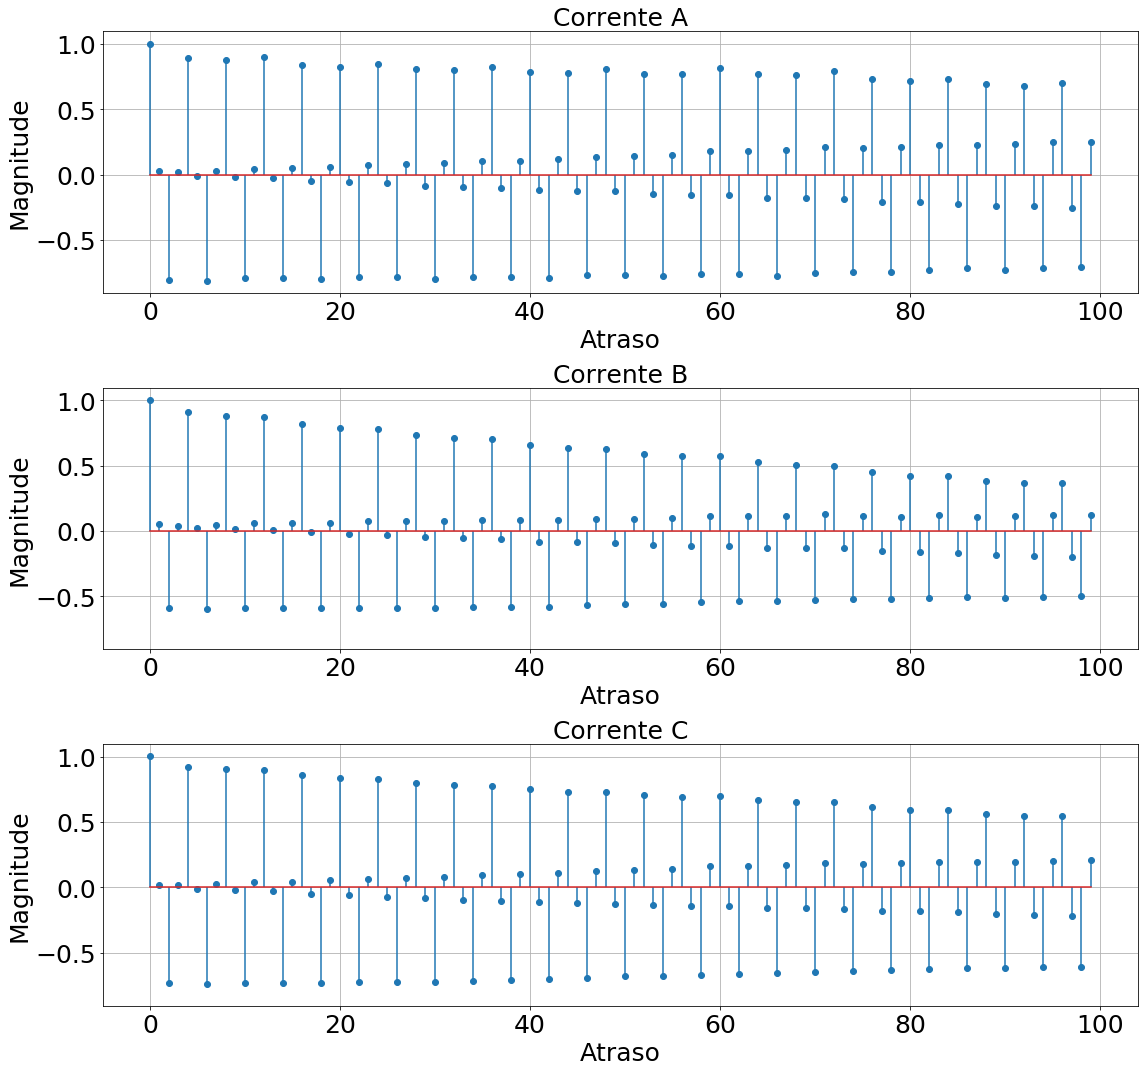

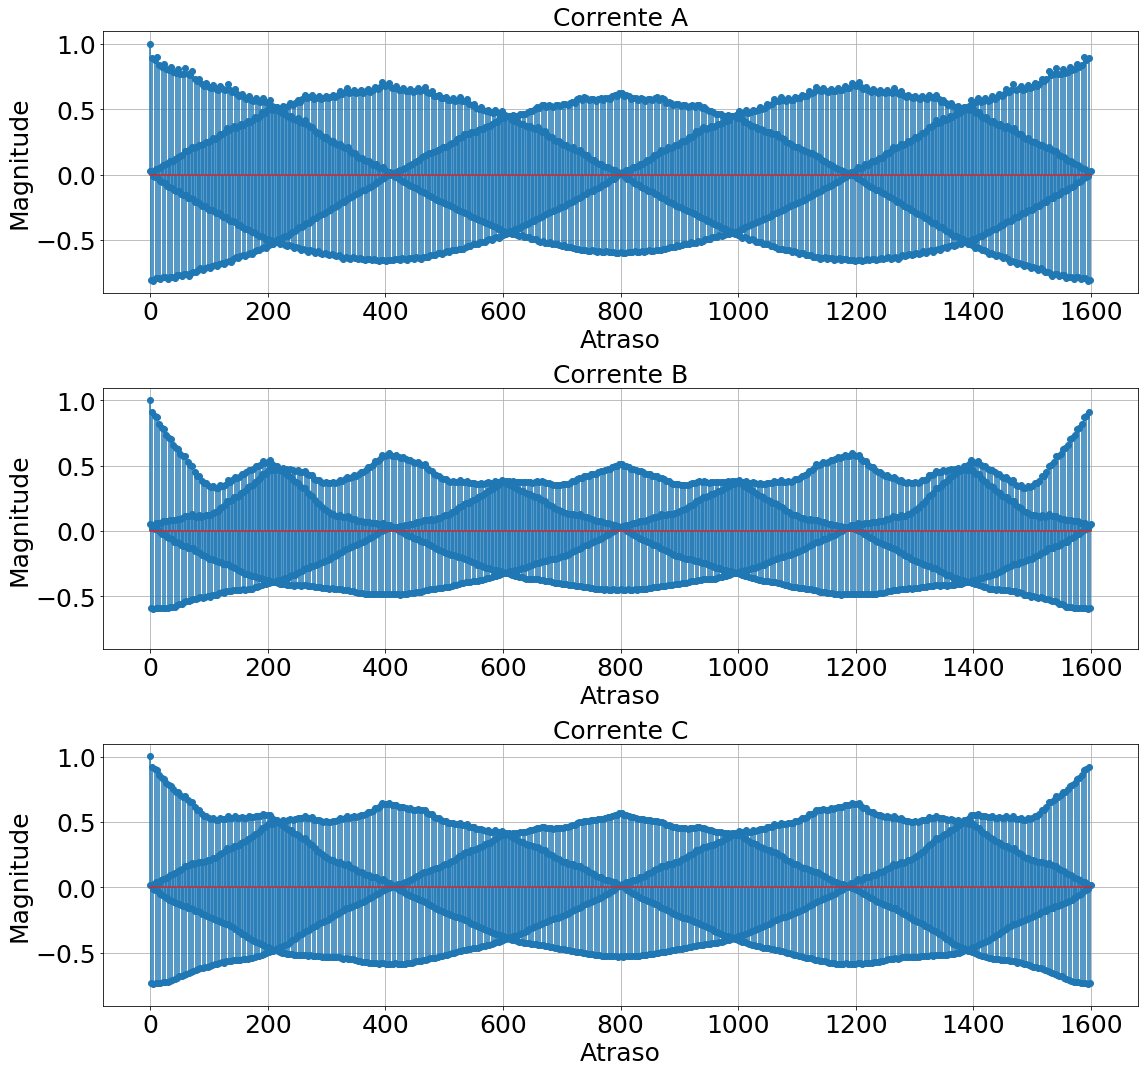

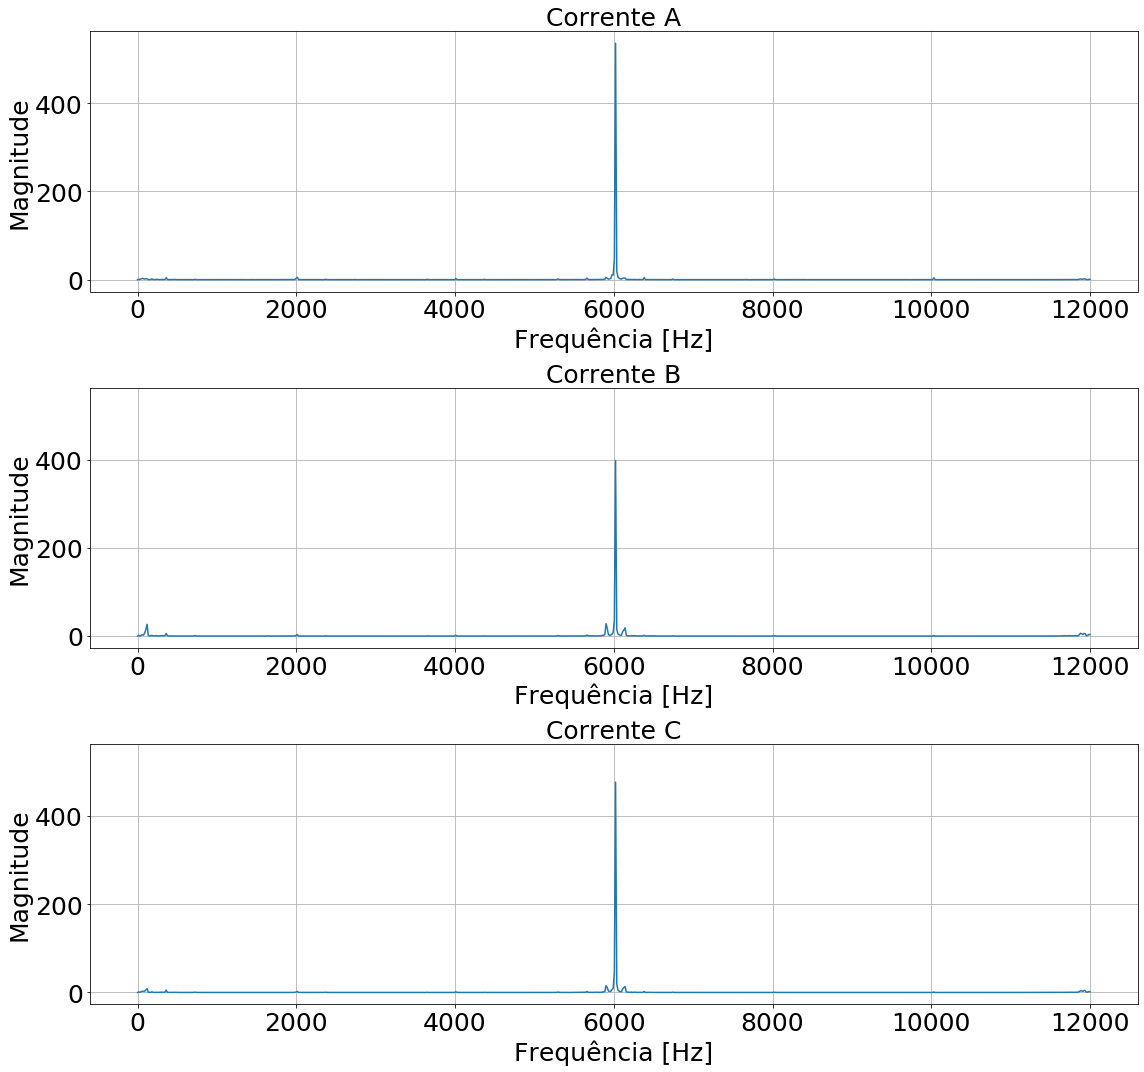

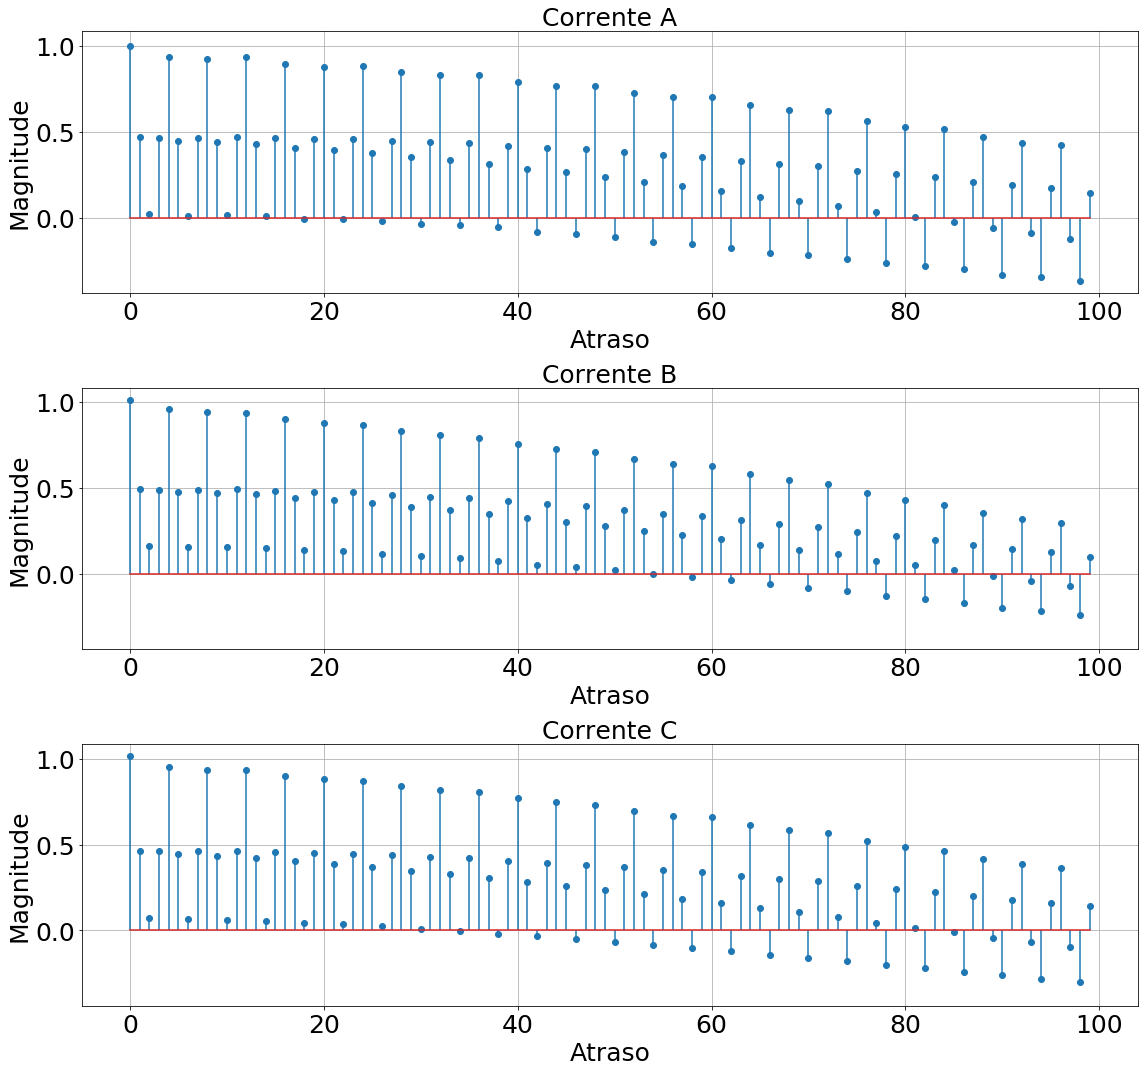

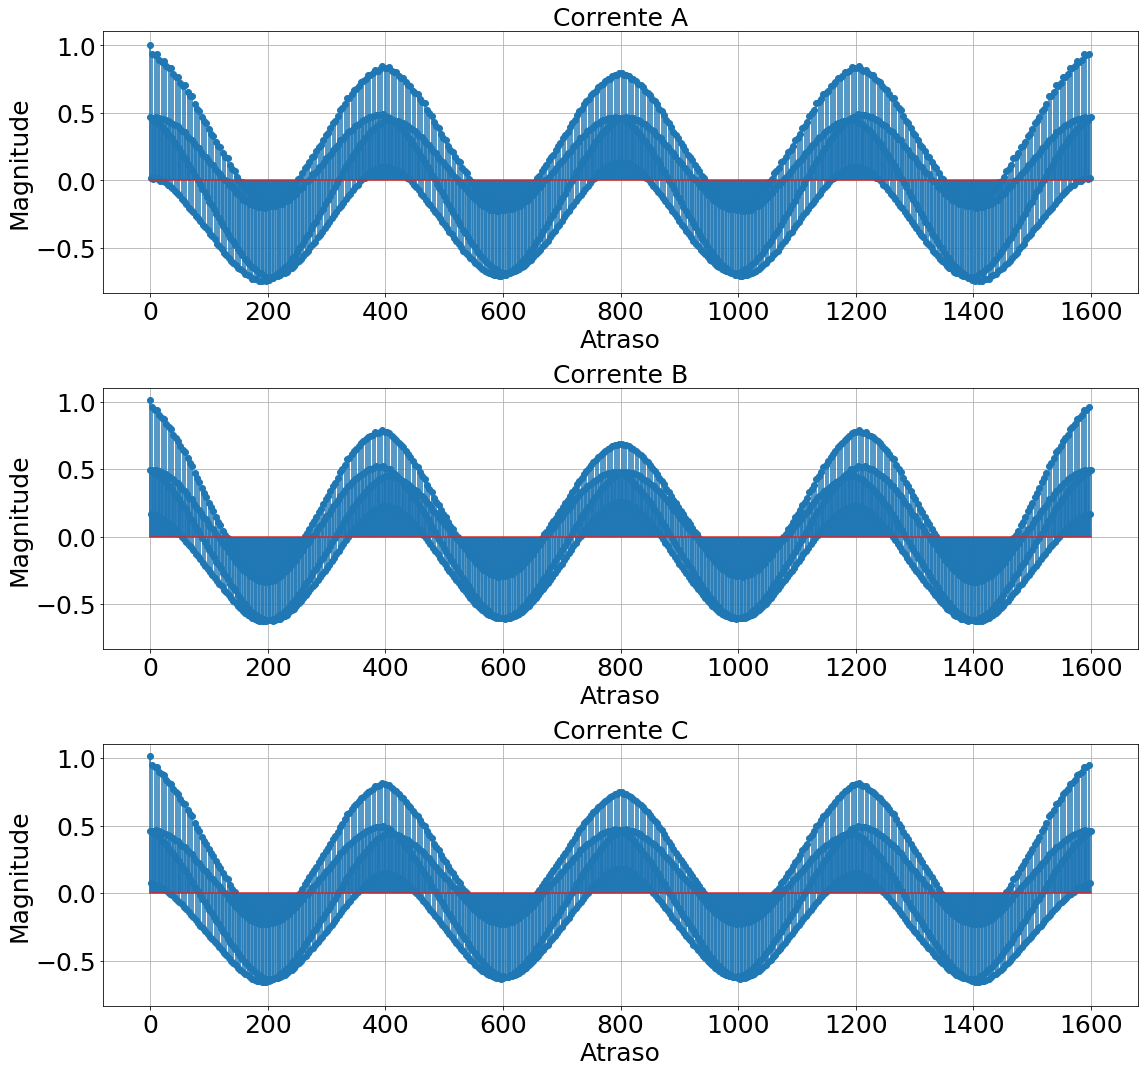

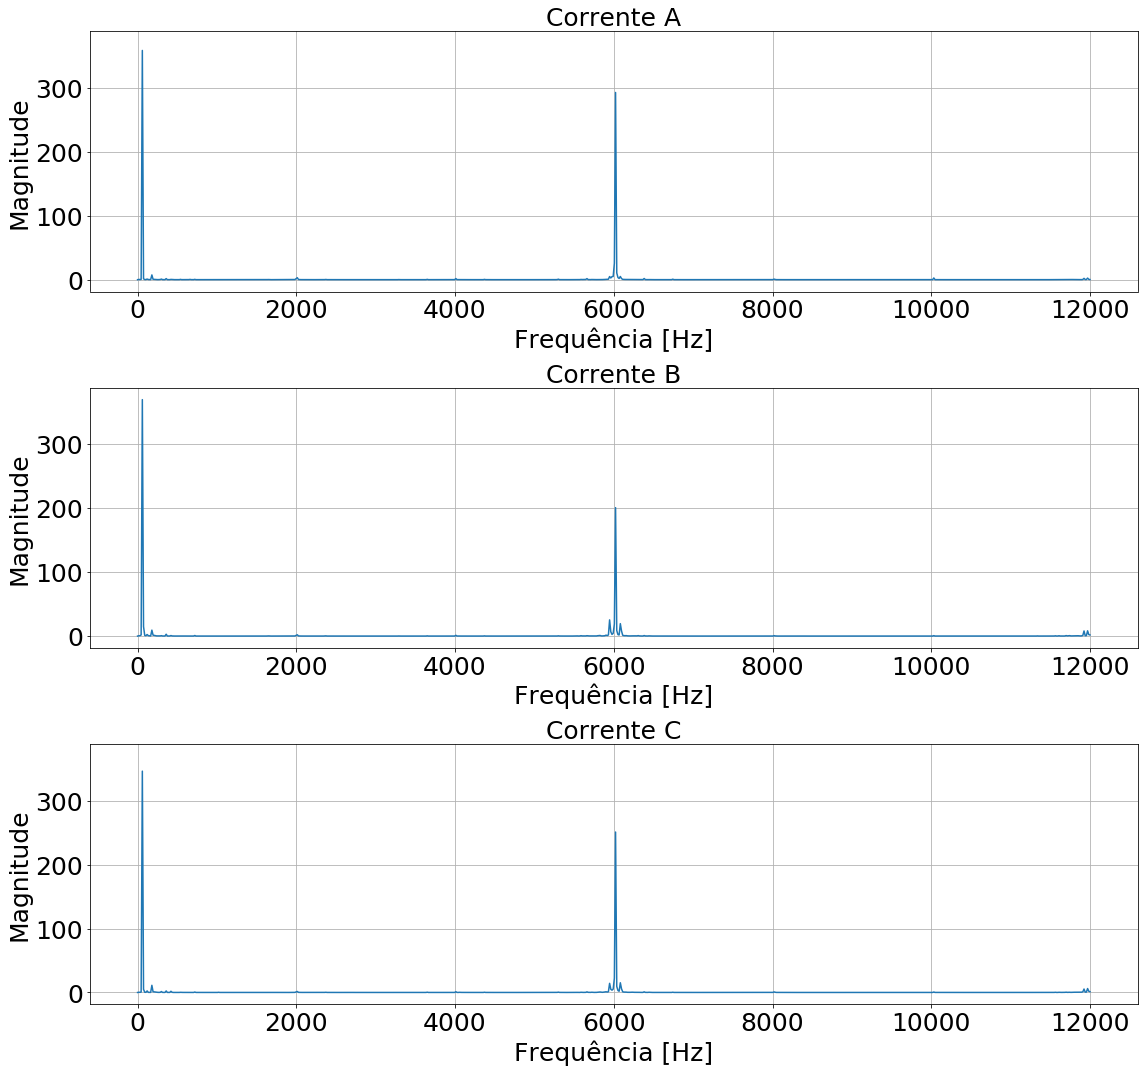

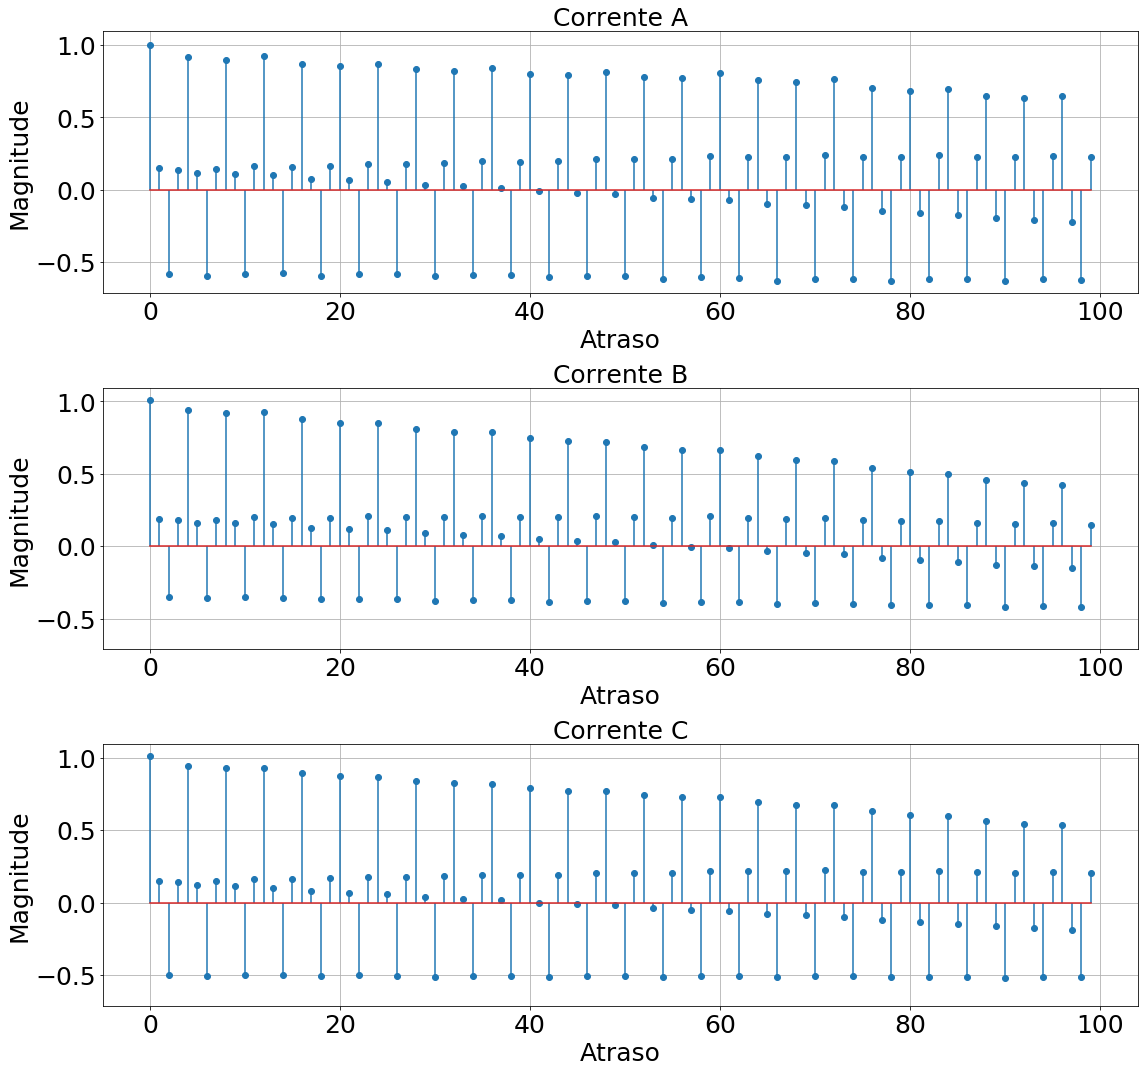

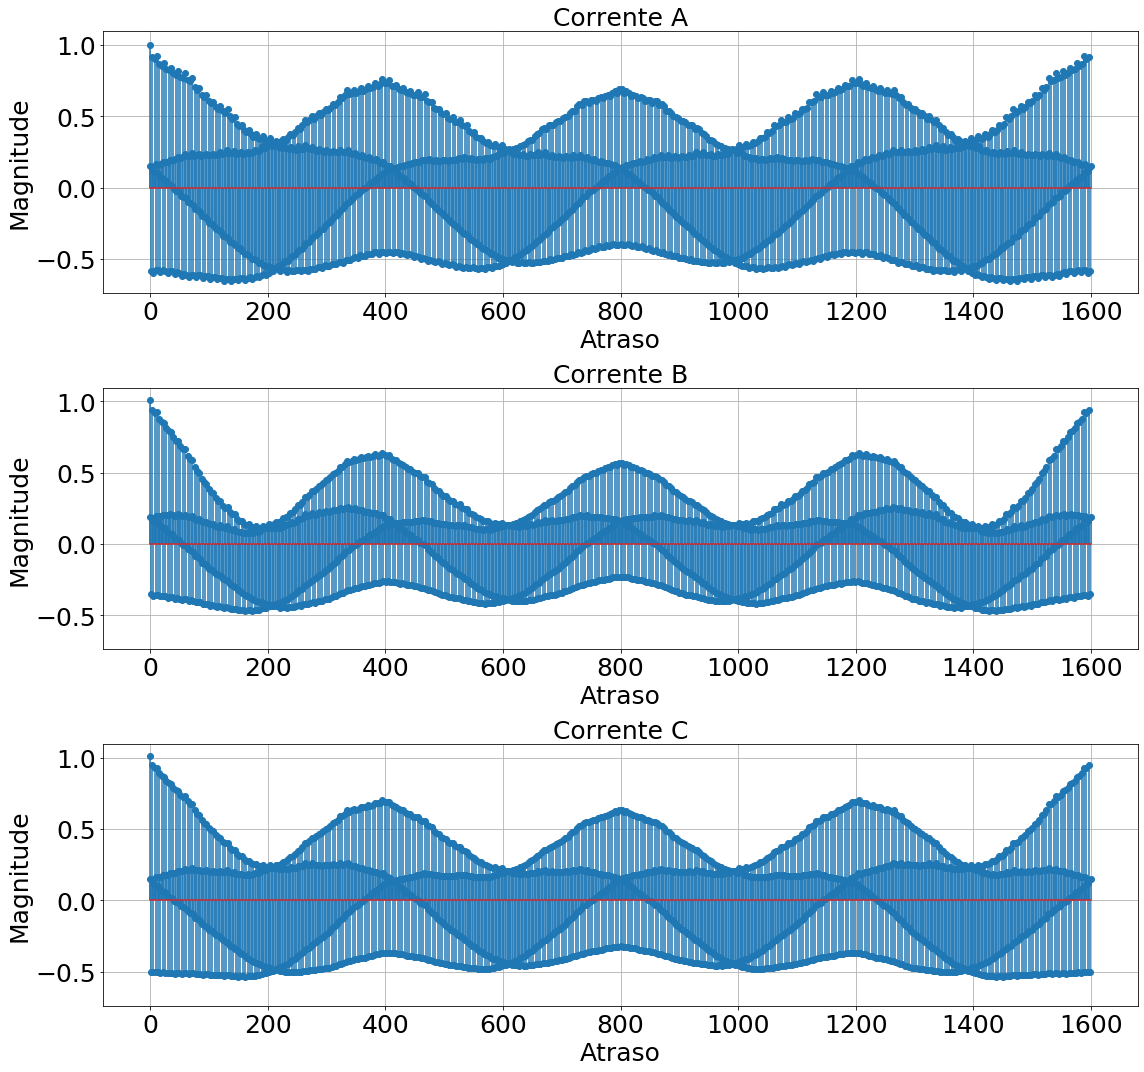

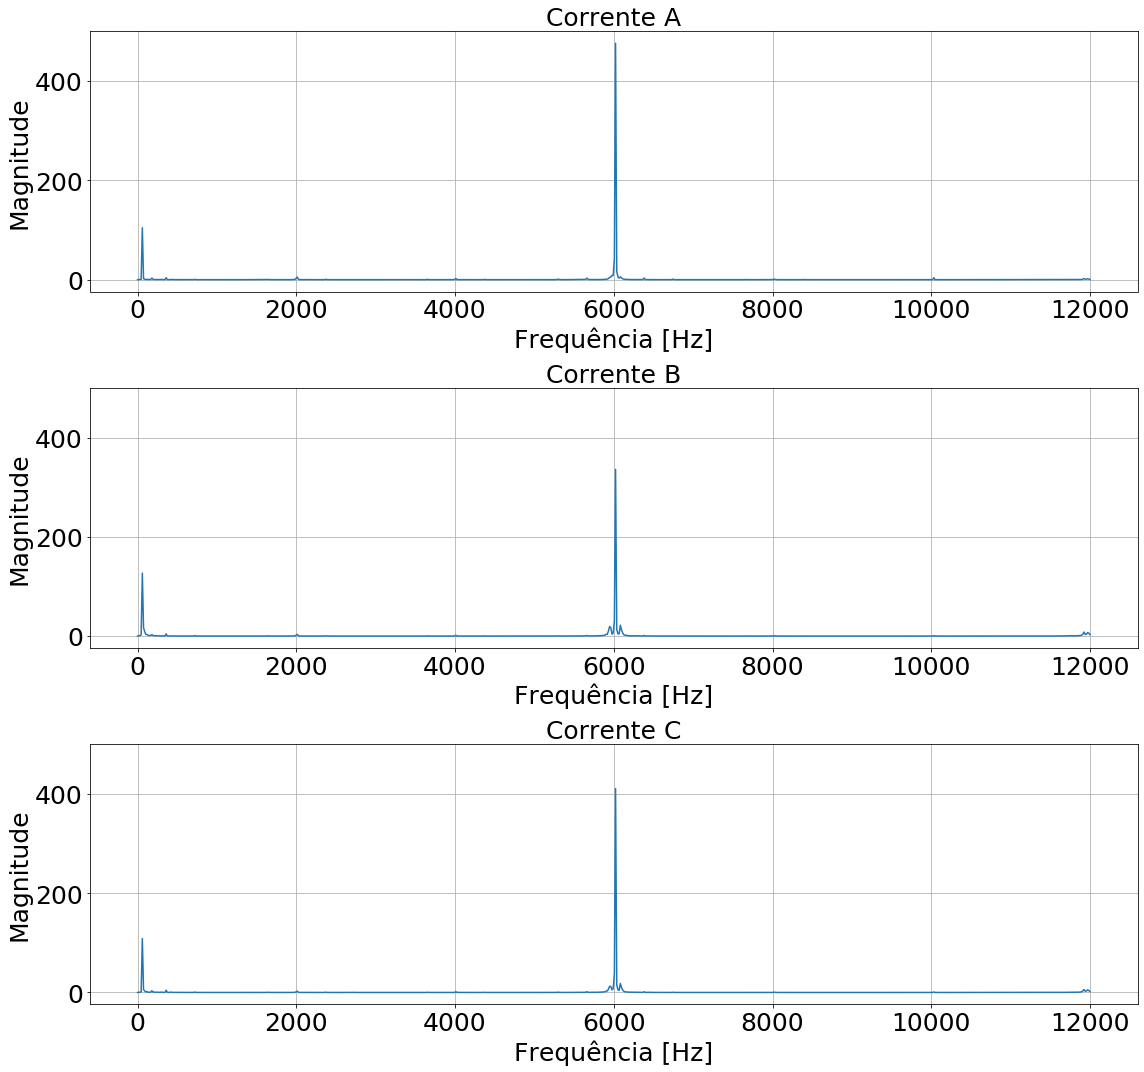

In [16]:
plotar_autocorrelacao(X_intermediate, "Ferramenta Intermediaria", size=[100, ts_len])

plotar_autocorrelacao(X_inadequate, "Ferramenta Inadequada", size=[100, ts_len])

plotar_autocorrelacao(X_adequate, "Ferramenta Adequada", size=[100, ts_len])

# Ergodicidade

In [17]:
def verificar_ergodicidade(X, titulo_superior, size):
    
    realizacoes, ts_len, sensores = X.shape
    
    idx = np.random.randint(0,realizacoes,5)
    
    idx.sort()
    
    print(idx)
    titulo = ["Corrente A", "Corrente B", "Corrente C"]

    fig = plt.figure(figsize=(16,15))
    ax = fig.subplots(3,1, sharey=True)

    for sensor in range(sensores):
        XX = X[idx,:,sensor]


        Rxx = []
        for i in range(ts_len):
            Rxx.append(np.diag(XX @ np.roll(XX, -i, 1).T)/ts_len/XX.var(1))

        Rxx = np.array(Rxx)

        ax[sensor].set_title(titulo[sensor], fontsize=25)

        for i in range(len(idx)):
            ax[sensor].stem(Rxx[:,i], markerfmt='x', use_line_collection=True)

        ax[sensor].set_xlabel('Atraso', fontsize=25)
        ax[sensor].set_ylabel('Magnitude', fontsize=25)


        ax[sensor].set_xlim(-1,size+1)

        ax[sensor].tick_params(axis='both', which='major', labelsize=25)
        ax[sensor].locator_params(axis='y', nbins=5)
        
        ax[sensor].grid()

        fig.tight_layout()

    plt.savefig(f"Figures/Ergodicidade_Autocorrelação_{titulo_superior.replace(' ', '_')}_{size}.png", bbox_inches='tight')
    plt.show()

Ferramenta Adequada
[ 67  71 116 444 544]


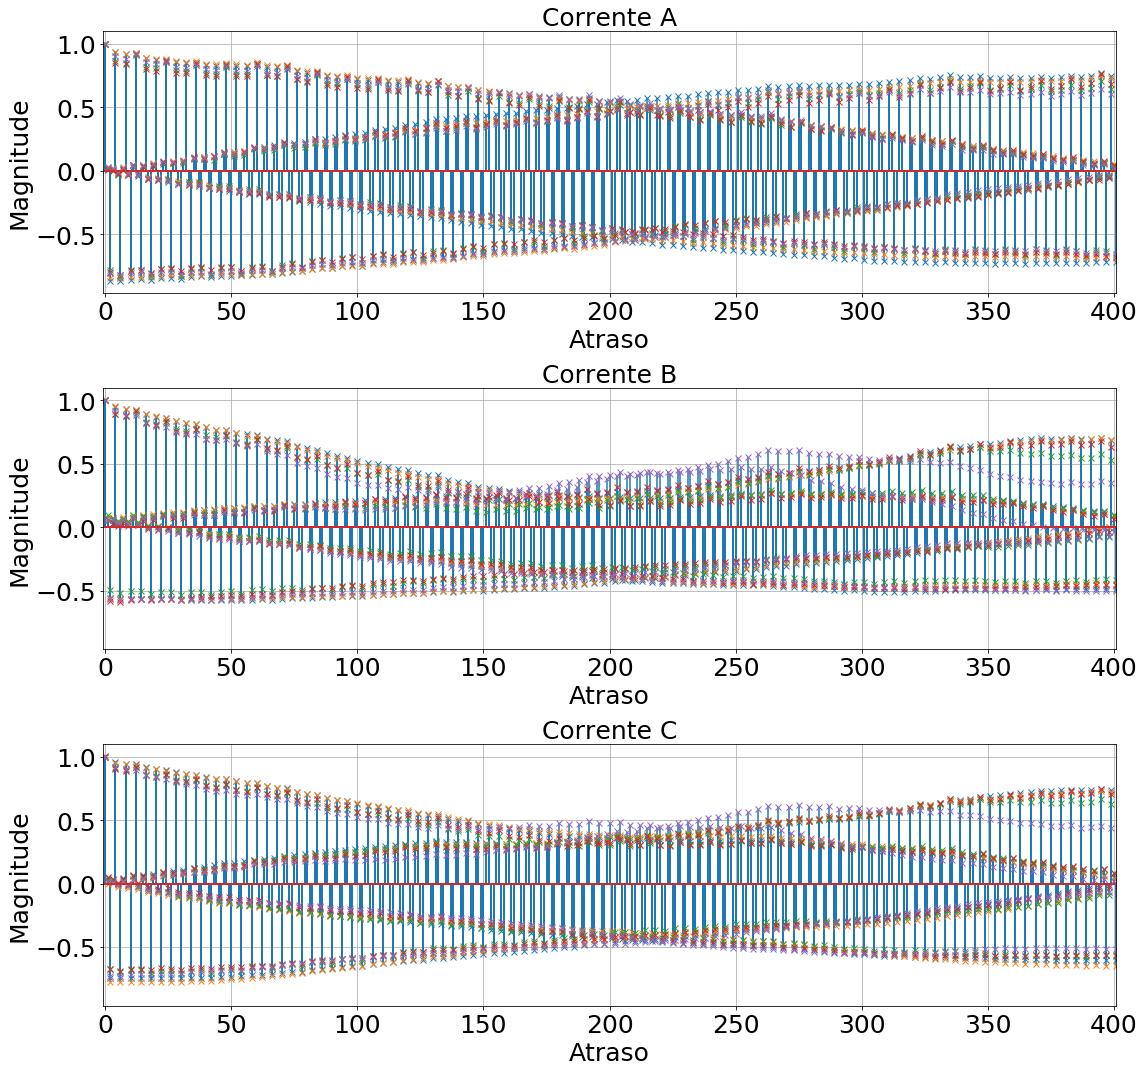

--
Ferramenta Intermediaria
[23 46 64 71 77]


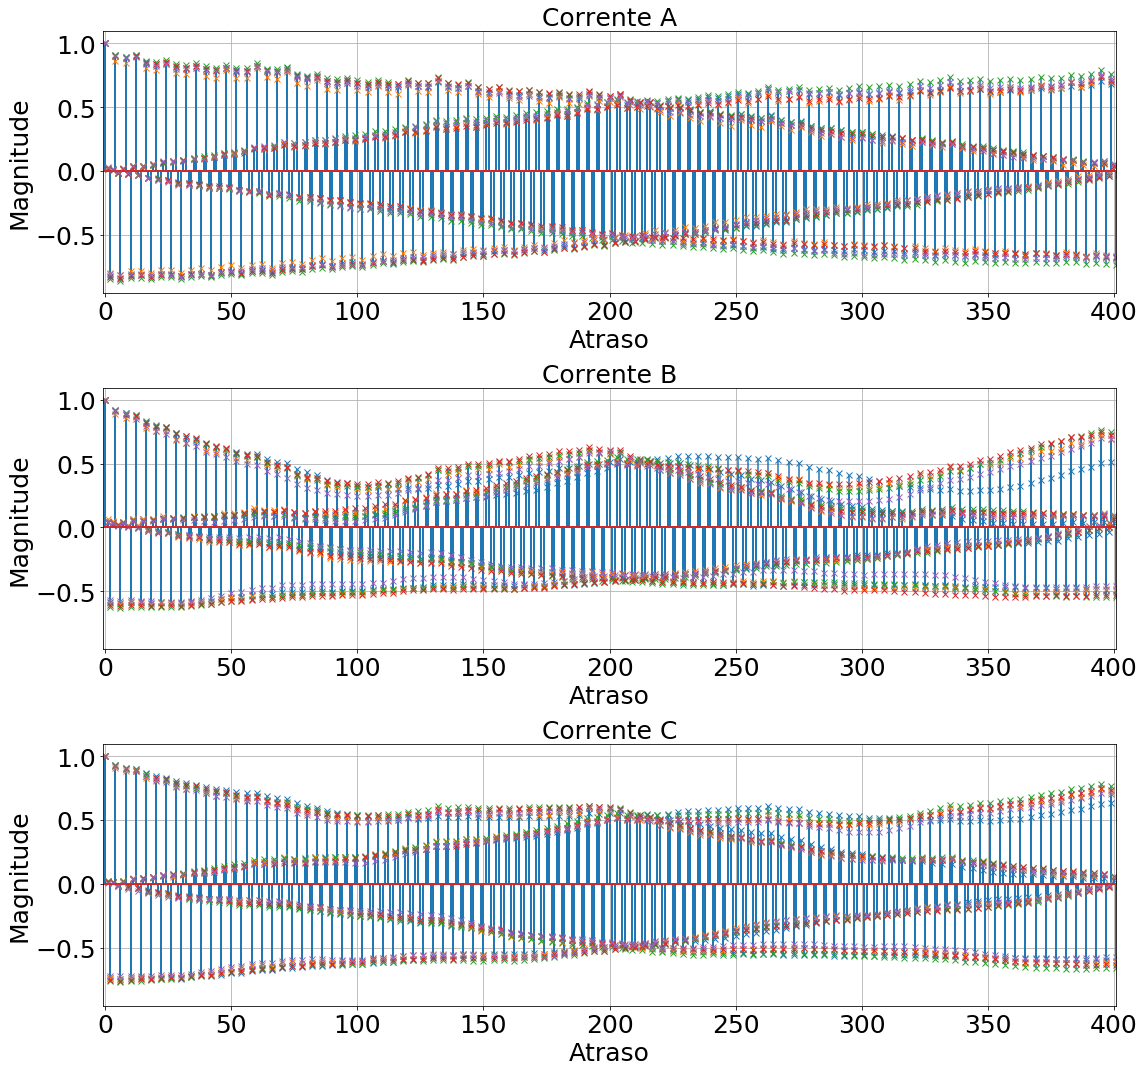

--
Ferramenta Inadequada
[ 40  62  83 118 145]


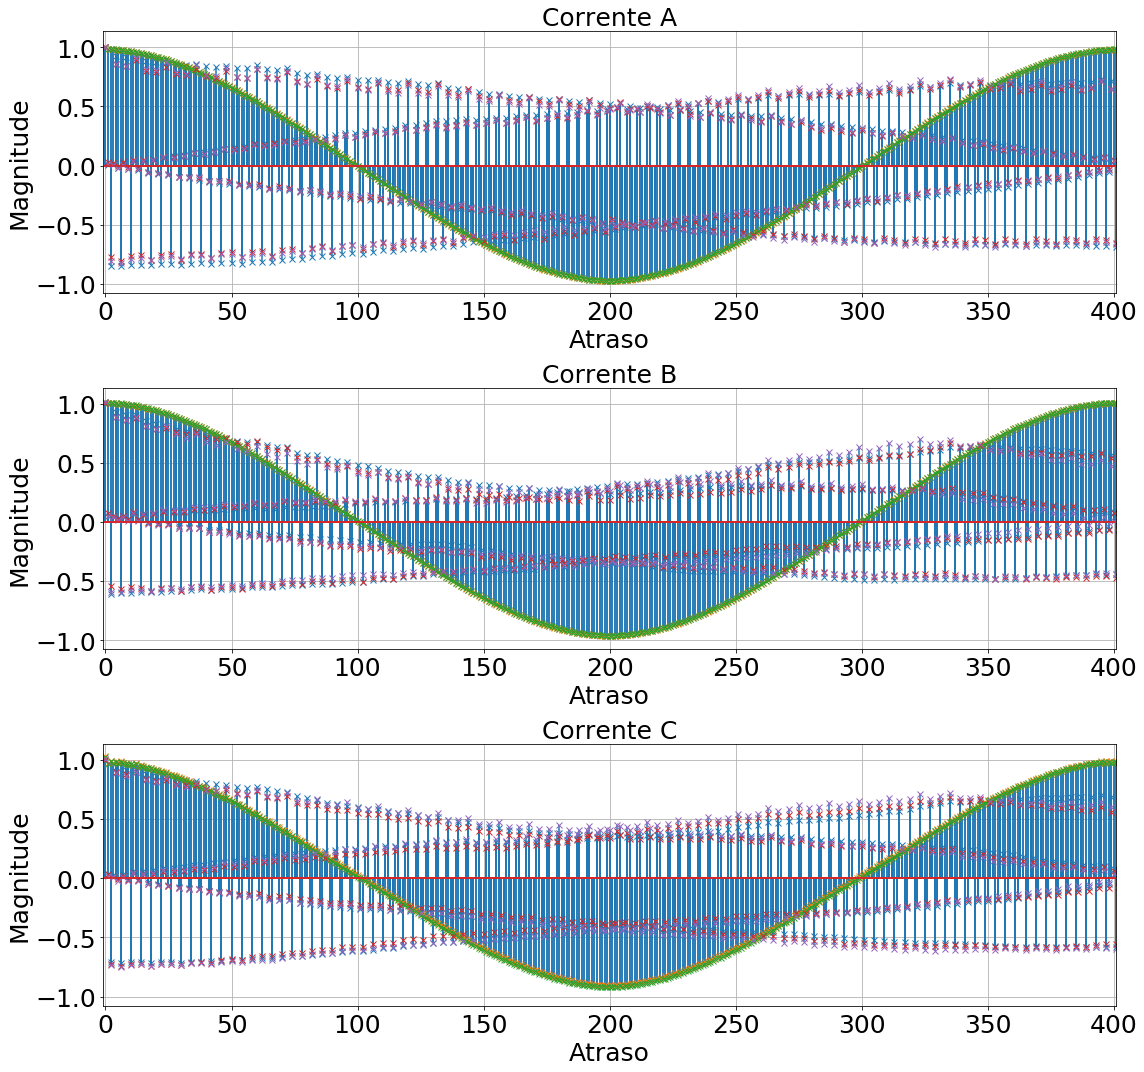

--


In [18]:
for s in [400]:
    print("Ferramenta Adequada")
    verificar_ergodicidade(X_adequate, "Ferramenta Adequada", size=s)
    print('--')
    
    print("Ferramenta Intermediaria")
    verificar_ergodicidade(X_intermediate, "Ferramenta Intermediaria", size=s)
    print('--')

    print("Ferramenta Inadequada")
    verificar_ergodicidade(X_inadequate, "Ferramenta Inadequada", size=s)
    print('--')    